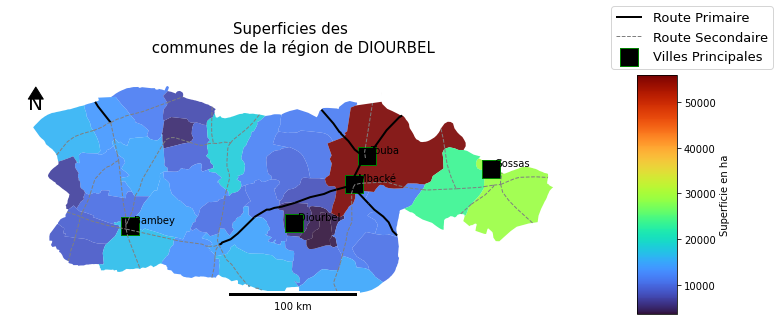

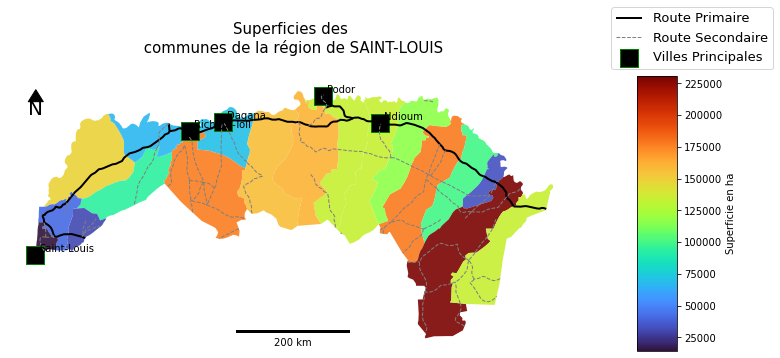

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 27 11:07:21 2021

@author: diouf
"""


#1. Import the GUI librairies 

from tkinter.ttk import *
from tkinter import messagebox

from tkinter import *
from tkinter import PhotoImage
import os
import sys
import tkinter
from PIL import Image, ImageTk

import geopandas as gpd
import matplotlib.pyplot as plt
import adjustText as aT
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
import matplotlib.cm as cm

#2. Create the main window 


window=Tk()
frame=Frame(window, bg="#C3EFB8")
window.title('Application de Cartographie des superficies communales des régions du Sénégal')
window.geometry('760x550')
window.minsize(460, 360)
window.maxsize(800, 600)
window.config(background='#C3EFB8')
window.attributes('-topmost',True)
window.iconbitmap('data/sen.ico')

#3. Create the entry list and the welcome message


label_title =Label(frame, text="Bienvenue sur l'application".upper(), font=("Courrier", 30), bg='#C3EFB8', fg='#0101FA')
label_title.pack()
frame.pack(expand=YES)
reg = ttk.Combobox(frame, 
                            values=[
                                    "Dakar", 
                                    "Thiès",
                                    "Diourbel",
                                    "Louga",
                                    "Kaffrine",
                                    "Matam",
                                    "Saint-Louis",
                                    "Kolda",
                                    "Kédougou",
                                    "Tambacounda",
                                    "Fatick",
                                    "Kaolack",
                                    "Sédhiou",
                                    "Ziguinchor"] , width=39)




#4. Create the application


def region_entry():
    data= gpd.read_file('data/SEN_adm4.shp')
    localities=gpd.read_file('data/LOC_SN.shp')
    routes = gpd.read_file('data/SEN_roads.shp')
    
    data=data.to_crs(epsg=32628)
    routes=routes.to_crs(epsg=32628)







#Calculer les superficies en ha
    data['sup/ha']=data['geometry'].area/10000


#Listes pour la carto et legende

    roadPalette = {'Route Primaire': 'Black',
               'Route Secondaire': 'gray'}
    linestyles={'Route Primaire': '-',
            'Route Secondaire': '--'
               }
    linewidths = {'Route Primaire': 2, 'Route Secondaire': 1}


#Créer la liste des régions
    liste_region=data['NAME_1'].unique()
    region=str(reg.get())
    if region in liste_region:
        fig , ax = plt.subplots(figsize=(12,12))
        divider=make_axes_locatable(ax)
        cax=divider.append_axes('right', size='7%', pad=0.8)
        
        couche=data.loc[data['NAME_1']==str(region)]
        route_reg = gpd.overlay(routes, couche, how = 'intersection')
        loc_reg = gpd.overlay(localities, couche, how = 'intersection')

        
        couche.plot(column ='sup/ha', cmap='turbo', alpha=0.9, 
                    edgecolor='none', ax=ax, legend=True, cax=cax, legend_kwds={'label': 'Superficie en ha'})
        
        for ctype, route_reg in route_reg.groupby('TYPE'):
            
            # Define the color for each group using the dictionary
            color = roadPalette[ctype]
            
            # Plot each group using the color defined above
            route_reg.plot(ax=ax,
                      label=ctype,
                      color=color,
                      linestyle=linestyles[ctype],
                      linewidth=linewidths[ctype]
                      )
        
     
        for ctype, loc_reg in loc_reg.groupby('group'):
            label = ctype
            loc_reg.plot(color='black',
                      ax=ax,
                      label=label,
                      edgecolor='green',
                      marker='s',
                      markersize=300
                      )
        #loc_reg.plot(ax=ax, color="red", markersize=200, edgecolor="white")
       
        for x, y, label in zip(loc_reg.geometry.x, loc_reg.geometry.y, loc_reg.Ville):
            ax.annotate(label, xy=(x, y), xytext=(4, 3), textcoords="offset points")
            
        ax.legend(bbox_to_anchor=(1.35, 1), prop={'size': 13}, loc='lower right')
        ax.axis('off')

        
        x, y, arrow_length = 0.05, 0.95, 0.07
        ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
                ha='center', va='center', fontsize=20,
                xycoords=ax.transAxes)
            
        titlec='Superficies des \n communes de la région de ' +region.upper() +' \n'
        ax.set_title(titlec,fontdict={'fontsize':15})
            
        scalebar = ScaleBar(3, "m", length_fraction=0.25, location=('lower center'))
        ax.add_artist(scalebar)
            
        tkinter.messagebox.showinfo('Résultat', f" La carte de la région de {reg.get()}  a été créée dans le dossier")
        outpoutname ='Région_de_'+region+'.png'
        fig.savefig(outpoutname)
        file ='Région_de_'+region+'.png'
        fig=str(fig)+'1'
        
    else :
        tkinter.messagebox.showinfo('Résultat', f" Veuillez entrer ou sélectionner le nom d'une région")
        
width = 1000
height = 900


def close_the_app():
    window.destroy()
   
def open_file_output():
    region=str(reg.get())
    file ='Région_de_'+region+'.png'
    novi = Toplevel()
    novi.iconbitmap('data/sen.ico')
    novi.attributes('-topmost',True)
        
    def close_the_map():
        novi.destroy()
    close_map=Button(novi, text="Fermer", font=("Courrier", 15), bg='#A9BCF5', fg='red', command=close_the_map)
    close_map.pack(expand = YES, fill = BOTH)
    frame1=Frame(novi, bg="#C3EFB8")
    frame1.pack(expand=YES)
    canvas = Canvas(frame1, width = width, height = height)
    canvas.pack(expand = YES, fill = BOTH)
    img = PhotoImage(file = file )
                                #image not visual
    canvas.create_image(width/2.5, height/2, image = img, anchor=CENTER)
    #assigned the gif1 to the canvas object
    canvas.img = img
    

def update_the_map():
    reg.delete(0, END)

#mGui = Tk()

open_button=Button(frame, text="Ouvrir le resultat", font=("Courrier", 15), bg='white', fg='black', command=open_file_output)



#5. Creating bottons 


yt_text=Label(frame, text="Veuillez entrer correctement ou sélectionner le nom de la région à cartographier", font=("Courrier", 15), bg='#C3EFB8', fg='black')

yt_text.pack(pady=25, fill=X)
reg.pack(expand=YES)

update_map=Button(frame, text="Actualiser", font=("Courrier", 15), bg='white', fg='black', command=update_the_map)
close_app=Button(frame, text="Fermer", font=("Courrier", 15), bg='white', fg='black', command=close_the_app)

yt_button=Button(frame, text="Créer la carte de la région", font=("Courrier", 15), bg='#0C9D9D', fg='black', command=region_entry)
yt_button.pack(pady=25, fill=X)

open_button.pack(pady=20, fill=Y)
update_map.pack(pady=20, fill=Y)
close_app.pack(pady=20, fill=Y)


window.mainloop()


    
 
